In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл
n_samples = 1000

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,42,68,30,204126
1,41,62,31,192326
2,51,28,59,165326
3,94,134,66,884526
4,110,95,72,684126


In [3]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-139.69696566 4990.29378951 7646.25328898]
Bias: -370585.64798869507
Error: 58172.7550183091


In [4]:
y.median()

305876.0

In [5]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [4988.91337136 7643.08636928]
Bias: -379582.91887155303
Error: 58293.49857077015


In [6]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,42,68,30,204126,2040
1,41,62,31,192326,1922
2,51,28,59,165326,1652
3,94,134,66,884526,8844
4,110,95,72,684126,6840


In [7]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('Error: {:.5f}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: 126.00000000017462
Error: 0.00000


# Задание
По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. 
Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

# Решение

Создаю искусственный датасет с лишними столбцами

In [8]:
def get_hw_data():
    n_samples = 1000

    age_owner = np.random.choice(90, n_samples) + 21
    length = np.random.choice(120, n_samples) + 15
    width = np.random.choice(80, n_samples) + 10
    extraneous_property_one = np.random.choice(800, n_samples) + 100
    extraneous_property_two = np.random.choice(2, n_samples)
    
    price = length * width / age_owner * 100 + 126

    data = pd.DataFrame({
        'age_owner': age_owner, 
        'length': length, 
        'width': width, 
        'price': price, 
        'extraneous_property_one': extraneous_property_one, 
        'extraneous_property_two': extraneous_property_two,
    })
    return data

hw_data = get_hw_data()
hw_data.head()

,age_owner,length,width,price,extraneous_property_one,extraneous_property_two
0,95,55,40,2441.789474,358,0
1,101,100,16,1710.158416,880,1
2,56,31,68,3890.285714,536,1
3,109,42,72,2900.311927,264,1
4,105,36,27,1051.714286,305,1


In [9]:
hw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_owner                1000 non-null   int64  
 1   length                   1000 non-null   int64  
 2   width                    1000 non-null   int64  
 3   price                    1000 non-null   float64
 4   extraneous_property_one  1000 non-null   int64  
 5   extraneous_property_two  1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [10]:
hw_data.describe()

,age_owner,length,width,price,extraneous_property_one,extraneous_property_two
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.619000,75.638000,48.820000,7002.705232,500.793000,0.485000
std,26.478046,35.066917,23.422002,6325.581180,232.790183,0.500025
min,21.000000,15.000000,10.000000,311.393258,100.000000,0.000000
25%,42.750000,45.000000,28.000000,2600.690792,300.500000,0.000000
50%,66.500000,77.000000,48.000000,5091.494228,499.500000,0.000000
75%,88.250000,106.000000,69.000000,9253.234610,698.250000,1.000000
max,110.000000,134.000000,89.000000,42659.333333,899.000000,1.000000


#### Общий осмотр данных

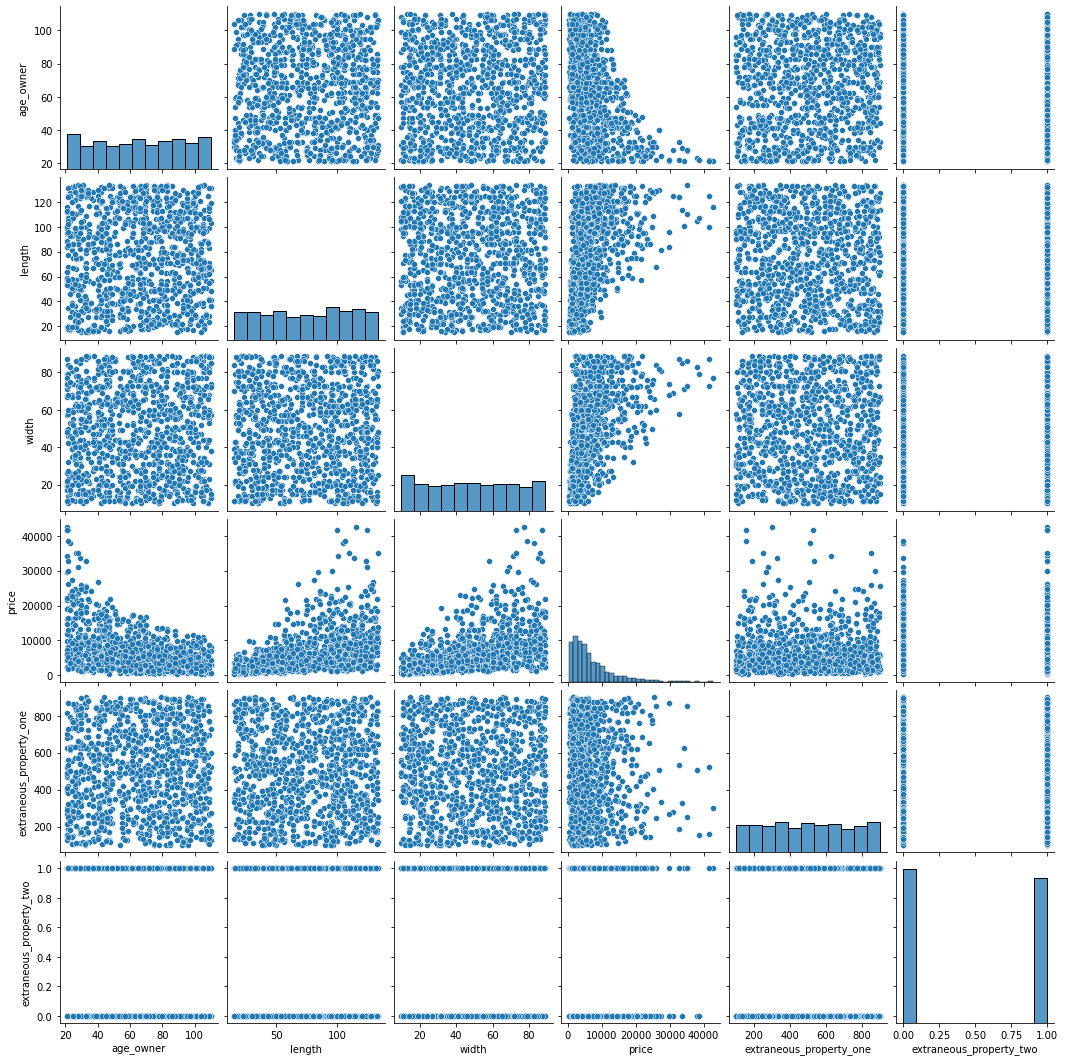

In [11]:
sns.pairplot(hw_data)

Кажется что у price есть выбросы. Проверим это на графике с коробкой

<AxesSubplot:xlabel='price'>

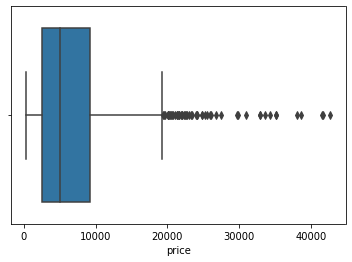

In [12]:
sns.boxplot(x=hw_data['price'])

**Вывод:**

- Почти все данные распределены равномерно
- Кажется что есть связь столбца price с lenght и width 
- Есть выбросы

#### Нахождение зависимости с price

<AxesSubplot:>

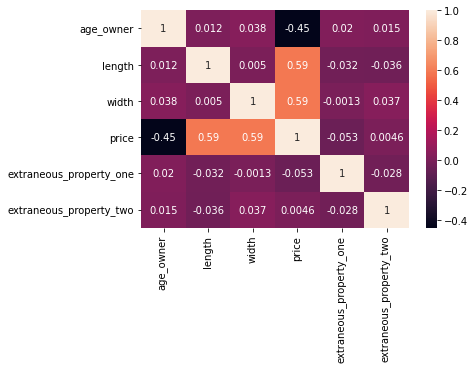

In [13]:
sns.heatmap(hw_data.corr('spearman'), annot=True)

**Вывод:**

- Есть положительная связь, не очень явная, столбца price с lenght и width 
- Есть о рицательная связь, не очень явная, столбца price с lage_owner

#### Работа с выбросами

- Видно что максимальный возраст в данных это 110, убираем максимум по 0.75 квантилю
- Видно по графику что есть выбросы у price, убираем максимум по 0.7 квантилю

In [14]:
hw_data = hw_data.loc[
    hw_data['age_owner'] < hw_data['age_owner'].quantile(.8)
]

hw_data = hw_data.loc[
    (hw_data['price'] > hw_data['price'].quantile(.1))
    & (hw_data['price'] < hw_data['price'].quantile(.7))
]

#### Формирование данных дял обучения

Убираем столбцы которые не показали связь с price

In [15]:
hw_X = hw_data[['length', 'width', 'age_owner']]
hw_y = hw_data['price']

#### Обучение модели

In [16]:
def print_error_regression(X, y):
    hw_reg = LinearRegression().fit(X, y)
    print('Weights: {}'.format(hw_reg.coef_))
    print('Bias: {}'.format(hw_reg.intercept_))

    pred_values = hw_reg.predict(X)
    print('Error: {:.5f}'.format(mean_absolute_error(pred_values, y)))
    
print_error_regression(hw_X, hw_y)

Weights: [ 64.18465976  96.51630881 -68.78870685]
Bias: 169.48406110685846
Error: 721.40580
